In [1]:
#load necessary data
import sys
import scipy.io
import pandas as pd
data = scipy.io.loadmat('option_data.mat')
price = pd.read_csv('50ETF(20150209-20180704).CSV')
columns = ['Date','Code','Name','Due','Exercise Price','Opening','Clossing','Average','Settlement','Volumn','Turn Volumn','Open Interest','Change of OI','delta','gamma','vega','theta','rho','left','VSI','b-closing','b-VSI','Contract','Serial']
data_call_save_all = pd.DataFrame(data = data['data_call_save_all'],columns = columns)
data_put_save_all = pd.DataFrame(data = data['data_put_save_all'], columns = columns)

In [36]:
data_call_save_all

,date,price
0,2015/2/9,2.331
1,2015/2/10,2.369
2,2015/2/11,2.380
3,2015/2/12,2.384
4,2015/2/13,2.390
5,2015/2/16,2.394
6,2015/2/17,2.411
7,2015/2/25,2.370
8,2015/2/26,2.450
9,2015/2/27,2.438


In [2]:
dic = {'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}

In [3]:
def convect_price_data():
    for i in range(len(price['date'])):
        year,mon,day = price['date'][i].split('/',3)
        if len(day) == 1:
            day = '0' + day
        mon = dic[mon]
        new_date = day+'-'+mon+'-'+year
        price.loc[i,'date'] = new_date

In [4]:
#convert the price date to be the same as the data
convect_price_data()

In [5]:
price = price.set_index('date')

In [6]:
#cal the different between the exercise price and the real price
for i in range(len(data_call_save_all['Date'])):
    temp = data_call_save_all['Exercise Price'][i] - price.loc[data_call_save_all['Date'][i]]
    data_call_save_all.loc[i,'Diff'] = temp['price'][0]

In [7]:
price = price.reset_index()

In [8]:
for i in range(len(price['date'])):
    temp = data_call_save_all.loc[data_call_save_all['Date'] == price['date'][i]]
    temp = temp.loc[temp['left'] == temp['left'].values.min()[0][0]]
    temp = temp.reset_index(drop = True)
    id = temp['Diff'].abs().values.argmin()
    min_diff = temp['Diff'][id]
    min_vsi = temp['VSI'][id][0][0]
    if min_vsi == 0:
        print(price['date'][i])
        first_VSI = float('nan')
        second_VSI = float('nan')
        continue
    temp = temp.loc[temp['Diff'] > min_diff]
    if len(temp) == 0:
        first_VSI = float('nan')
        second_VSI = float('nan')
    elif len(temp) == 1:
        temp = temp.reset_index(drop = True)
        first_VSI = temp['VSI'][0][0][0] / min_vsi
        second_VSI = float('nan')
    else:
        temp = temp.sort_values(by = 'Diff')
        temp = temp.reset_index(drop = True)
        first_VSI = temp['VSI'][0][0][0] / min_vsi
        second_VSI = temp['VSI'][1][0][0] / min_vsi
    price.loc[i,'first_VSI'] = first_VSI
    price.loc[i,'second_VSI'] = second_VSI

21-Apr-2015
21-Jul-2015
25-Oct-2016
22-Nov-2016
24-Nov-2016
25-Nov-2016
28-Nov-2016
12-May-2017
15-May-2017
22-May-2017
21-Nov-2017


In [27]:
data_call_save_all

,Date,Code,Name,Due,Exercise Price,Opening,Clossing,Average,Settlement,Volumn,...,vega,theta,rho,left,VSI,b-closing,b-VSI,Contract,Serial,Diff
208,[26-Feb-2015],[10000001.SH],[50ETF购2015年3月2.20],[2015/3/25],[[2.2]],[[0.19]],[[0.253]],[[0.22047263242375603]],[[0.1876]],[[1246]],...,[[0.0016785022312872171]],[[-0.5637414252521451]],[[0.0012966978748126688]],[[20]],[[0]],[[2.45]],[[0.3863281458917223]],[[10000]],[[209]],-0.1536
428,[09-Mar-2015],[10000001.SH],[50ETF购2015年3月2.20],[2015/3/25],[[2.2]],[[0.1466]],[[0.1974]],[[0.1542634911894273]],[[0.1533]],[[1816]],...,[[0.0012260578949319493]],[[-0.6713683439659714]],[[0.0007853316756752318]],[[13]],[[0]],[[2.397]],[[0.3925402649121743]],[[10000]],[[429]],-0.1027
526,[12-Mar-2015],[10000003.SH],[50ETF购2015年3月2.30],[2015/3/25],[[2.3]],[[0.095]],[[0.149]],[[0.1370748820754717]],[[0.0894]],[[848]],...,[[0.001304024720146267]],[[-0.8315288804015112]],[[0.0006332653810186841]],[[10]],[[0]],[[2.448]],[[0.3944750679344446]],[[10000]],[[527]],-0.0517
532,[12-Mar-2015],[10000011.SH],[50ETF购2015年4月2.20],[2015/4/22],[[2.2]],[[0.2058]],[[0.2501]],[[0.24102890262751156]],[[0.1969]],[[647]],...,[[0.0022888862560329613]],[[-0.48335948331525186]],[[0.0018695606772207273]],[[29]],[[0]],[[2.448]],[[0.3944750679344446]],[[10000]],[[533]],-0.1517
556,[13-Mar-2015],[10000001.SH],[50ETF购2015年3月2.20],[2015/3/25],[[2.2]],[[0.2559]],[[0.257]],[[0.2701776923076923]],[[0.2525]],[[1300]],...,[[0.0005611607372793639]],[[-0.4148287410724794]],[[0.0006687297834397242]],[[9]],[[0]],[[2.455]],[[0.39421966862659474]],[[10000]],[[557]],-0.1584
557,[13-Mar-2015],[10000002.SH],[50ETF购2015年3月2.25],[2015/3/25],[[2.25]],[[0.2056]],[[0.2008]],[[0.22014075342465753]],[[0.1985]],[[292]],...,[[0.000846494133232023]],[[-0.5915579367867196]],[[0.0006454110985720966]],[[9]],[[0]],[[2.455]],[[0.39421966862659474]],[[10000]],[[558]],-0.1084
558,[13-Mar-2015],[10000003.SH],[50ETF购2015年3月2.30],[2015/3/25],[[2.3]],[[0.1553]],[[0.1563]],[[0.1716951573849879]],[[0.149]],[[413]],...,[[0.0011595230434935215]],[[-0.7841189369089525]],[[0.0006057813536145711]],[[9]],[[0]],[[2.455]],[[0.39421966862659474]],[[10000]],[[559]],-0.0584
564,[13-Mar-2015],[10000011.SH],[50ETF购2015年4月2.20],[2015/4/22],[[2.2]],[[0.2637]],[[0.26]],[[0.2762533487297921]],[[0.2525]],[[433]],...,[[0.002169195129221475]],[[-0.46074640352238583]],[[0.0018655111033129882]],[[28]],[[0]],[[2.455]],[[0.39421966862659474]],[[10000]],[[565]],-0.1584
588,[16-Mar-2015],[10000001.SH],[50ETF购2015年3月2.20],[2015/3/25],[[2.2]],[[0.2685]],[[0.3075]],[[0.2855335742971888]],[[0.257]],[[1245]],...,[[0.00014560855246746344]],[[-0.18279015147983163]],[[0.0005328316139952203]],[[8]],[[0]],[[2.51]],[[0.3952740614874895]],[[10000]],[[589]],-0.2112
589,[16-Mar-2015],[10000002.SH],[50ETF购2015年3月2.25],[2015/3/25],[[2.25]],[[0.2187]],[[0.2598]],[[0.2319347619047619]],[[0.2094]],[[420]],...,[[0.0003017746083310544]],[[-0.30706551284771316]],[[0.000532416426879135]],[[8]],[[0]],[[2.51]],[[0.3952740614874895]],[[10000]],[[590]],-0.1612


In [9]:
import numpy as np
price = price.dropna()
price.reset_index()
MA = np.zeros([2, len(price)-39])
for i in range(39, len(price)):
    MA[0][i-39] = price['first_VSI'][i-39:i].mean()
    MA[1][i-39] = price['second_VSI'][i-39:i].mean()
#MA.shape
#len(price) 
MS = np.zeros([2, len(price)-39])
for i in range(39, len(price)):
    MS[0][i-39] = price['first_VSI'][i-39:i].std()
    MS[1][i-39] = price['second_VSI'][i-39:i].std()

In [10]:
Upp_Bnd = MA + MS
Low_Bnd = MA - MS

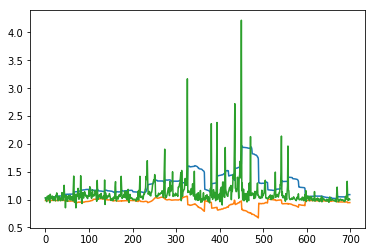

In [15]:
import matplotlib.pyplot as plt
plt.plot(Upp_Bnd[0])
plt.plot(Low_Bnd[0])
plt.plot(price['first_VSI'].values[39:len(price['first_VSI'])])
plt.show()

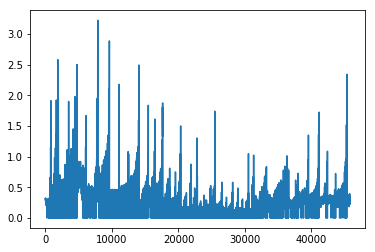

In [16]:
plt.plot(data_call_save_all['VSI'])